In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Clustering.csv')

In [3]:
df.head()

,Unnamed: 0,x,y
0,1,3.367596,3.536694
1,2,2.667870,4.479919
2,3,1.344171,3.282591
3,4,1.389414,4.683227
4,5,1.644644,4.320822


In [4]:
df.shape

(190, 3)

In [5]:
df.describe()

,Unnamed: 0,x,y
count,190.000000,190.000000,190.000000
mean,95.500000,4.721308,6.345303
std,54.992424,3.294171,3.614820
min,1.000000,-1.428115,-0.476742
25%,48.250000,1.713220,3.126976
50%,95.500000,3.462090,4.697728
75%,142.750000,7.858967,9.802251
max,190.000000,10.674577,12.894445


In [6]:
df.isna().sum()

Unnamed: 0    0
x             0
y             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop(columns='Unnamed: 0')

In [9]:
df.head()

,x,y
0,3.367596,3.536694
1,2.667870,4.479919
2,1.344171,3.282591
3,1.389414,4.683227
4,1.644644,4.320822


In [10]:
X = df.copy() # X-axis contains all the features while Y-axis contains n_clusters

In [11]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)

Elbow Method

In [12]:
from sklearn.cluster import KMeans

In [13]:
n_cluster = range(1,30)
wcss = []
for i in n_cluster:
    model = KMeans(n_clusters=i)
    model.fit(X_scaled)
    wcss.append(model.inertia_)

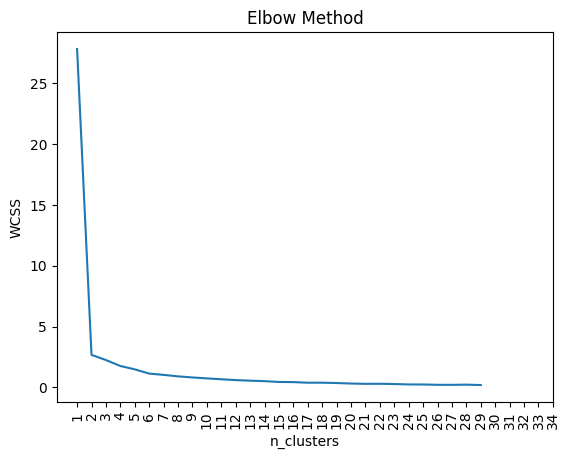

In [14]:
import matplotlib.pyplot as plt
plt.plot(n_cluster,wcss)
plt.xlabel("n_clusters")
plt.ylabel("WCSS")
plt.xticks(range(1,35),rotation=90)
plt.title("Elbow Method")
plt.show()

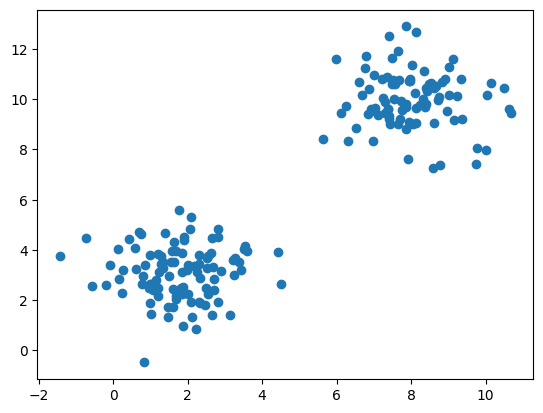

In [15]:
plt.scatter(df['x'],df['y'])
plt.show()

In [16]:
final=KMeans(n_clusters=2)
final.fit(X_scaled)

KMeans(n_clusters=2)

In [17]:
X_scaled.shape

(190, 2)

In [18]:
df['cluster']=final.labels_

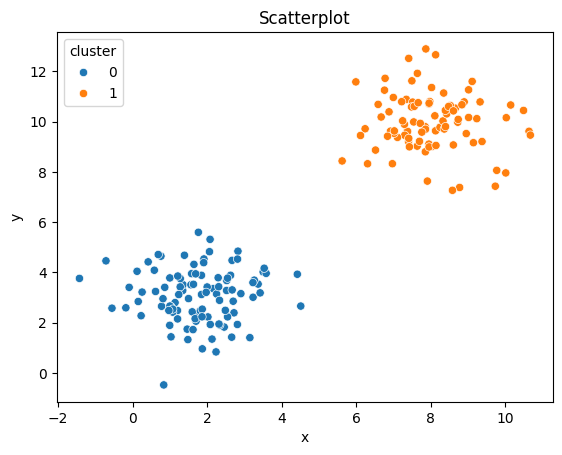

In [19]:
import seaborn as sns
sns.scatterplot(x=df['x'],y=df['y'],hue=df['cluster'])
plt.title("Scatterplot")
plt.show()

Evaluation

*Silhouette Score = b-a/max(b,a)*

*b ----> Inter cluster distance*

*a ----> Intra cluster distance*

*value range = -1 to 1*

*Ideally b > a*

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled,final.labels_)

np.float64(0.795572649620447)